## Анализ поездок на такси в Нью-Йорке

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

Загружаем данные

In [4]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet', engine='pyarrow')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Преобразуем поле payment_type в соответсвии с документацией этих данных, чтобы сделать его более понятным. Также удалим не интересующие нас данные.

In [5]:
payment_type = {
    0: 'unknown',
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"}

df['payment_type'] = df['payment_type'].apply(lambda x: payment_type[x])
df.drop(['VendorID', 'RatecodeID', 'store_and_fwd_flag'],
        axis = 1, inplace = True)

df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,138,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Посмотрим на объем данных, их тип и на некоторые описательные статистики.

In [6]:
df.shape

(3066766, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           object        
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  airport_fee            float64       
dtypes: datetime64[ns](2), float64(11), int64(2), object(1)
memory usage: 374.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,2995023.0,1.362532,0.896120,0.00,1.00,1.00,1.00,9.00
trip_distance,3066766.0,3.847342,249.583756,0.00,1.06,1.80,3.33,258928.15
PULocationID,3066766.0,166.398046,64.244131,1.00,132.00,162.00,234.00,265.00
DOLocationID,3066766.0,164.392631,69.943682,1.00,114.00,162.00,234.00,265.00
fare_amount,3066766.0,18.367069,17.807822,-900.00,8.60,12.80,20.50,1160.10
extra,3066766.0,1.537842,1.789592,-7.50,0.00,1.00,2.50,12.50
mta_tax,3066766.0,0.488290,0.103464,-0.50,0.50,0.50,0.50,53.16
tip_amount,3066766.0,3.367941,3.826759,-96.22,1.00,2.72,4.20,380.80
tolls_amount,3066766.0,0.518491,2.017579,-65.00,0.00,0.00,0.00,196.99
improvement_surcharge,3066766.0,0.982085,0.183353,-1.00,1.00,1.00,1.00,1.00


Каких-то отклонений здесь нет, посчитаем пропущенные значения.

In [9]:
df.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

У нас есть 71 тысяча пропущенных значений это около 2%, при общем объеме данных в 3 миллиона, поэтому просто исключим эти данные из рпассмотрения.

In [10]:
df = df.dropna()

### Распределение заказов в рамках месяца

In [12]:
df["pickup_date"] = df['tpep_pickup_datetime'].dt.date
trip_count_by_day = df.groupby('pickup_date', as_index=False).agg({'trip_distance': 'count'})
trip_count_by_day.head()

,pickup_date,trip_distance
0,2008-12-31,2
1,2022-10-24,4
2,2022-10-25,7
3,2022-12-31,25
4,2023-01-01,73286


In [13]:
trip_count_by_day.tail()

,pickup_date,trip_distance
31,2023-01-28,109119
32,2023-01-29,86095
33,2023-01-30,81979
34,2023-01-31,98011
35,2023-02-01,10


После группировки и подсчета числа заказов по дням, видны несколько ошибок в данных. Наши данные за январь 2023 года, а данных за 2022 и 2008 год у нас быть не может. Поэтому исключим их. И пересчитаем число заказов по дням.

In [14]:
df = df[(df['pickup_date'] >= date(2023, 1, 1)) & (df['pickup_date'] <= date(2023, 1, 31))]
days = {0: 'Mo', 1: 'Tu', 2: 'We', 3: 'Th', 4: 'Fr', 5: 'Sa', 6: 'Su'}

trip_count_by_day = df.groupby('pickup_date', as_index=False).agg({'trip_distance': 'count'})
trip_count_by_day['weekday'] = trip_count_by_day['pickup_date'].apply(datetime.weekday)
trip_count_by_day['weekday_name'] = trip_count_by_day['weekday'].apply(lambda x: days[x])
trip_count_by_day.head()

,pickup_date,trip_distance,weekday,weekday_name
0,2023-01-01,73286,6,Su
1,2023-01-02,64544,0,Mo
2,2023-01-03,83755,1,Tu
3,2023-01-04,92977,2,We
4,2023-01-05,98829,3,Th


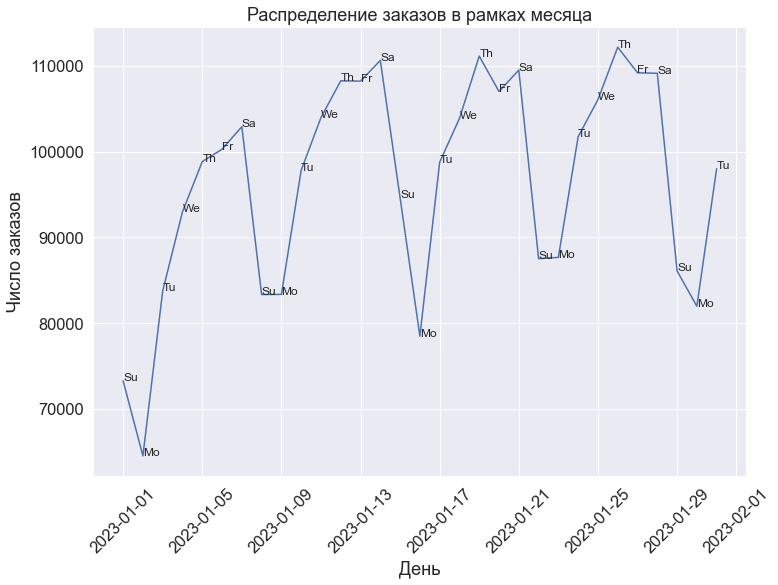

In [15]:
days = {0: 'Mo', 1: 'Tu', 2: 'We', 3: 'Th', 4: 'Fr', 5: 'Sa', 6: 'Su'}

sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)
fig = sns.lineplot(data=trip_count_by_day, y='trip_distance', x="pickup_date", markers=True)
plt.xlabel("День")
plt.ylabel("Число заказов")
plt.title("Распределение заказов в рамках месяца") 
plt.xticks(rotation=45)
for date, trip, weekday in zip(trip_count_by_day['pickup_date'], trip_count_by_day['trip_distance'],
                               trip_count_by_day['weekday_name']):
    fig.annotate(weekday, xy=(date, trip), fontsize=12)
plt.show(fig)

Здесь наблюдается явная сезонность по неделям. Если сопоставить дни недели с датами, получим что больше всего заказов получается c четверга по субботу, а меньше всего в понедельник и воскресенье. Это логично, по пятницам и в выходные в конце недели люди отдыхают где-нибудь вне дома и потом много пользуются такси. Но интересным представляется то, что число поездок стабильно растет с понедельника и до конца недели, а в понедельник обваливается. То есть в начале недели люди ездят на такси меньше чем в конце.

Посмотрим также на распределение числа пассажиров по дням

### Распределение числа пассажиров в рамках месяца

In [16]:
df["pickup_date"] = df['tpep_pickup_datetime'].dt.date
passenger_count_by_day = df.groupby('pickup_date', as_index=False).agg({'passenger_count': 'sum'})
passenger_count_by_day['weekday'] = passenger_count_by_day['pickup_date'].apply(datetime.weekday)
passenger_count_by_day['weekday_name'] = passenger_count_by_day['weekday'].apply(lambda x: days[x])
passenger_count_by_day.head()

,pickup_date,passenger_count,weekday,weekday_name
0,2023-01-01,113974.0,6,Su
1,2023-01-02,96851.0,0,Mo
2,2023-01-03,115287.0,1,Tu
3,2023-01-04,126389.0,2,We
4,2023-01-05,133863.0,3,Th


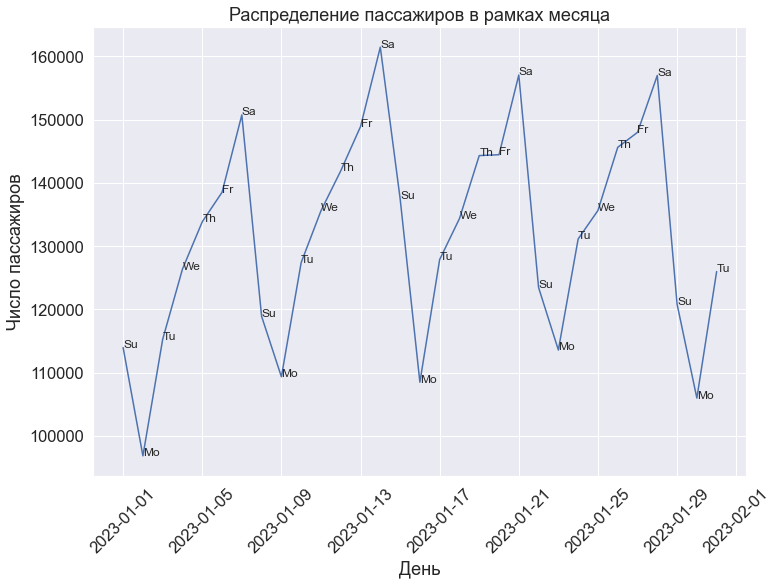

In [17]:
fig = sns.lineplot(data=passenger_count_by_day, y='passenger_count', x="pickup_date")
plt.xlabel("День")
plt.ylabel("Число пассажиров")
plt.title("Распределение пассажиров в рамках месяца") 
plt.xticks(rotation=45)
for date, trip, weekday in zip(passenger_count_by_day['pickup_date'], passenger_count_by_day['passenger_count'],
                               passenger_count_by_day['weekday_name']):
    fig.annotate(weekday, xy=(date, trip), fontsize=12)
plt.show(fig)

Здесь наблюдается аналогичная ситуация. Еще более ярко выраженная. В понедельник менешь всего людей езлит на такси, а в субботу наоборот больше всего и с понедельника по субботу число пассажиров стабильно растет.

### Распределение числа пассажиров в рамках дня

In [18]:
df["pickup_hour"] =  df['tpep_pickup_datetime'].dt.hour
passenger_count_by_hour = df.groupby(["pickup_date", "pickup_hour"], as_index=False)['passenger_count'].sum()
passenger_count_by_hour = passenger_count_by_hour.groupby('pickup_hour', as_index=False)['passenger_count'].mean()
passenger_count_by_hour.head()

,pickup_hour,passenger_count
0,0,3789.000000
1,1,2672.064516
2,2,1882.419355
3,3,1202.774194
4,4,757.774194


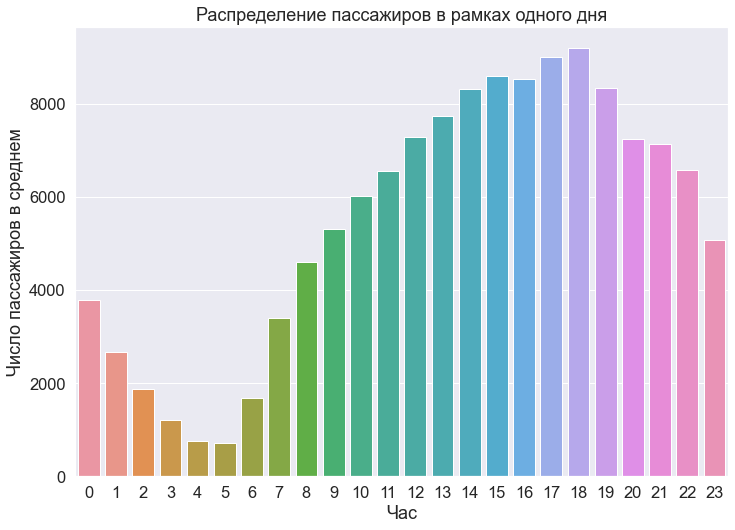

In [19]:
fig = sns.barplot(data=passenger_count_by_hour, y='passenger_count', x="pickup_hour")
plt.xlabel("Час")
plt.ylabel("Число пассажиров в среднем")
plt.title("Распределение пассажиров в рамках одного дня") 
plt.show(fig)

Здесь все стандартно. Самое маленькое число пассажиров ночью и ранним утром, минимум достигается в 5 утра. Потом наблюдается рост в течении всего дня до 19 часов вечера, а потом снова начинается спад.

## Самые популярные способы оплаты

In [20]:
payment_types = df.groupby('payment_type', as_index=False). \
            agg({'pickup_date': 'count', 'fare_amount': 'sum'}). \
            sort_values('pickup_date', ascending=False). \
            rename(columns={'pickup_date': 'count'})
payment_types['avg_fare_amount'] = payment_types['fare_amount'] / payment_types['count']
payment_types['percent'] = (round(payment_types['count'] / payment_types['count'].sum() * 100, 1)).apply(str) + '%'
payment_types

,payment_type,count,fare_amount,avg_fare_amount,percent
1,Credit card,2411428,44996967.18,18.659884,80.5%
0,Cash,532227,9624062.15,18.082627,17.8%
2,Dispute,33297,65076.98,1.954440,1.1%
3,No charge,18023,146225.83,8.113290,0.6%


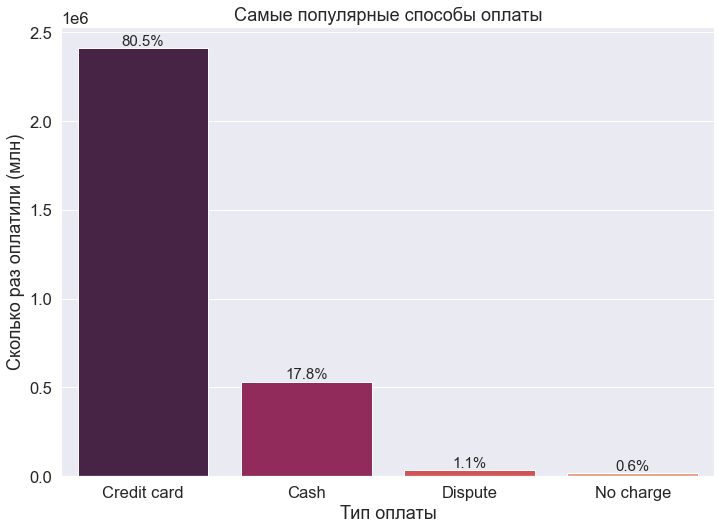

In [21]:
fig = sns.barplot(data=payment_types, y='count', x='payment_type', palette='rocket')
plt.ylabel("Сколько раз оплатили (млн)")
plt.title("Самые популярные способы оплаты") 
plt.xlabel("Тип оплаты")
for rect1, percent in zip(fig.patches, payment_types.percent):
    height = rect1.get_height()
    plt.annotate( percent,(rect1.get_x() + rect1.get_width() / 2, height + .05),ha="center",va="bottom",fontsize=15)

plt.show(fig)

Чаще всего поездки оплачивают с помощью крединой карты, потом идут наличные и далее спорные случаи.

Посмотрим как меняется средняя стоимость поездки в зависимости от способа оплаты.

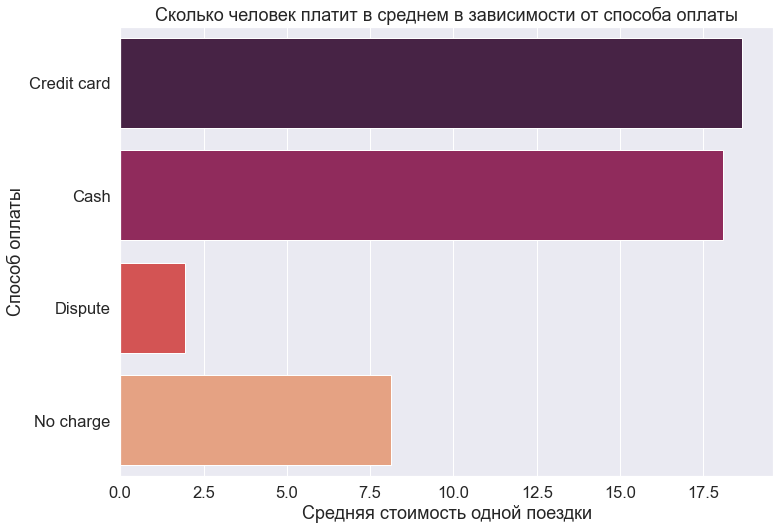

In [22]:
fig = sns.barplot(data=payment_types, x='avg_fare_amount', y='payment_type', palette='rocket')
plt.xlabel("Средняя стоимость одной поездки")
plt.ylabel("Способ оплаты")
plt.title("Сколько человек платит в среднем в зависимости от способа оплаты") 
plt.show(fig)

Между безналичным расчетом и наличным почти нет разницы.

In [23]:
amount_by_hour = df.groupby(["pickup_date", "pickup_hour"], as_index=False) \
        [['passenger_count', 'fare_amount']].sum()
avg_amount_by_hour = amount_by_hour.groupby('pickup_hour', as_index=False) \
        [['passenger_count', 'fare_amount']].mean()
avg_amount_by_hour['avg_fare_amount'] = avg_amount_by_hour['fare_amount'] / avg_amount_by_hour['passenger_count']

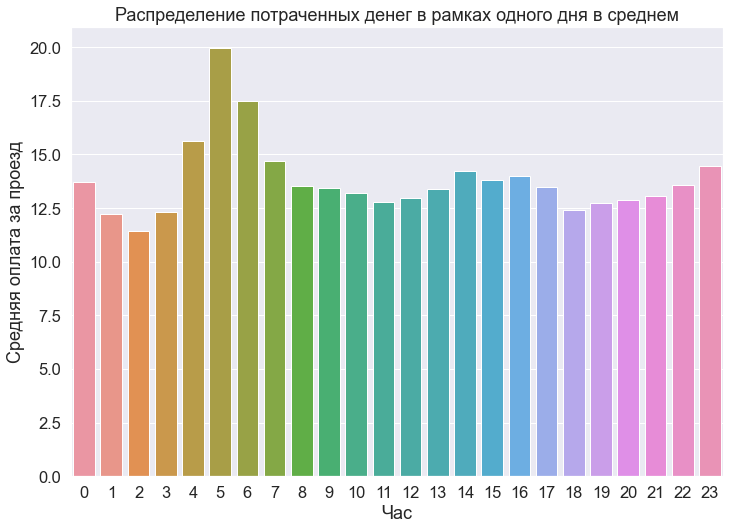

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)
fig = sns.barplot(data=avg_amount_by_hour, y='avg_fare_amount', x="pickup_hour")
plt.xlabel("Час")
plt.ylabel("Средняя оплата за проезд")
plt.title("Распределение потраченных денег в рамках одного дня в среднем") 
plt.show(fig)

Самые дорогие поездки происхлодят ночью когда наименьший спрос. В остальное время стоимость примерно одинаковая, с небольшими просадками в 12 часов дня и 18 часов вечера.

## Посмотрим на самые популярные места

Загрузим информацию по локациям.

In [25]:
taxi_zone = pd.read_csv('taxi_zone.csv')
taxi_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [26]:
df = df.merge(taxi_zone, left_on='PULocationID', right_on='LocationID')
df = df.drop(['LocationID', 'Borough', 'service_zone'], axis=1)
df = df.rename(columns={'Zone': 'from'})
df = df.merge(taxi_zone, left_on='DOLocationID', right_on='LocationID')
df = df.drop(['LocationID', 'Borough', 'service_zone'], axis=1)
df = df.rename(columns={'Zone': 'to'})
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,from,to
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,Cash,9.3,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,2023-01-01,0,Midtown Center,Lenox Hill West
1,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.00,161,141,Cash,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,2023-01-01,0,Midtown Center,Lenox Hill West
2,2023-01-01 00:11:44,2023-01-01 00:20:38,2.0,1.83,161,141,Credit card,11.4,1.0,0.5,1.64,0.0,1.0,18.04,2.5,0.0,2023-01-01,0,Midtown Center,Lenox Hill West
3,2023-01-01 00:35:52,2023-01-01 00:43:38,2.0,1.41,161,141,Cash,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,2023-01-01,0,Midtown Center,Lenox Hill West
4,2023-01-01 00:51:12,2023-01-01 00:59:38,1.0,1.80,161,141,Cash,10.0,3.5,0.5,0.00,0.0,1.0,15.00,2.5,0.0,2023-01-01,0,Midtown Center,Lenox Hill West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994970,2023-01-03 11:30:13,2023-01-03 12:31:50,1.0,24.00,213,99,Credit card,67.2,0.0,0.5,0.00,23.5,1.0,92.20,0.0,0.0,2023-01-03,11,Soundview/Castle Hill,Freshkills Park
2994971,2023-01-17 11:49:04,2023-01-17 12:11:46,1.0,6.20,206,99,Credit card,35.2,0.0,0.5,0.00,0.0,1.0,36.70,0.0,0.0,2023-01-17,11,Saint George/New Brighton,Freshkills Park
2994972,2023-01-21 13:53:44,2023-01-21 13:53:49,1.0,0.04,204,99,Cash,3.0,0.0,0.5,0.00,0.0,1.0,4.50,0.0,0.0,2023-01-21,13,Rossville/Woodrow,Freshkills Park
2994973,2023-01-21 13:55:23,2023-01-21 13:55:25,1.0,0.03,99,99,Cash,-3.0,0.0,-0.5,0.00,0.0,-1.0,-4.50,0.0,0.0,2023-01-21,13,Freshkills Park,Freshkills Park


In [28]:
places_from = df.groupby('from', as_index=False).agg({'extra': 'count'}). \
        rename(columns={'extra': 'count'}).sort_values('count', ascending=False)[:10]

In [29]:
places_to = df.groupby('to', as_index=False).agg({'extra': 'count'}). \
        rename(columns={'extra': 'count'}).sort_values('count', ascending=False)[:10]

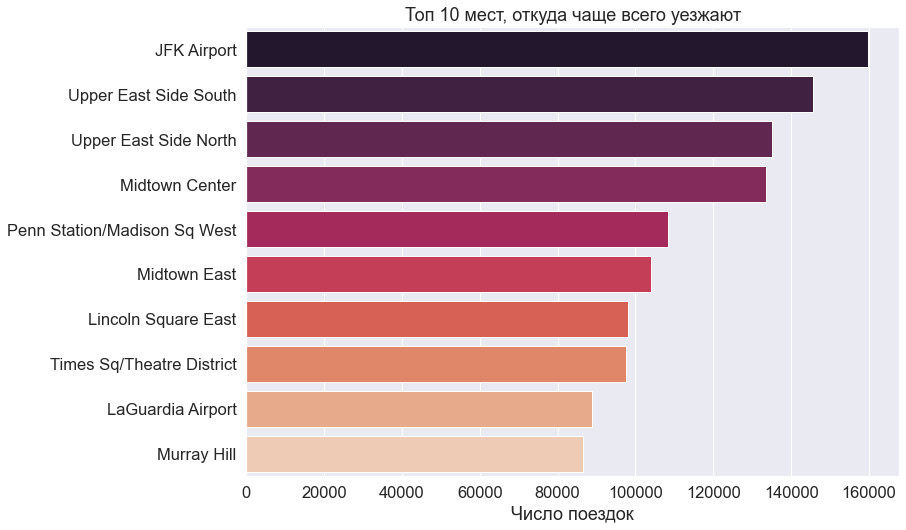

In [31]:
fig = sns.barplot(data=places_from, x='count', y='from', palette='rocket')
plt.xlabel("Число поездок")
plt.ylabel("")
plt.title("Топ 10 мест, откуда чаще всего уезжают") 
plt.show(fig)

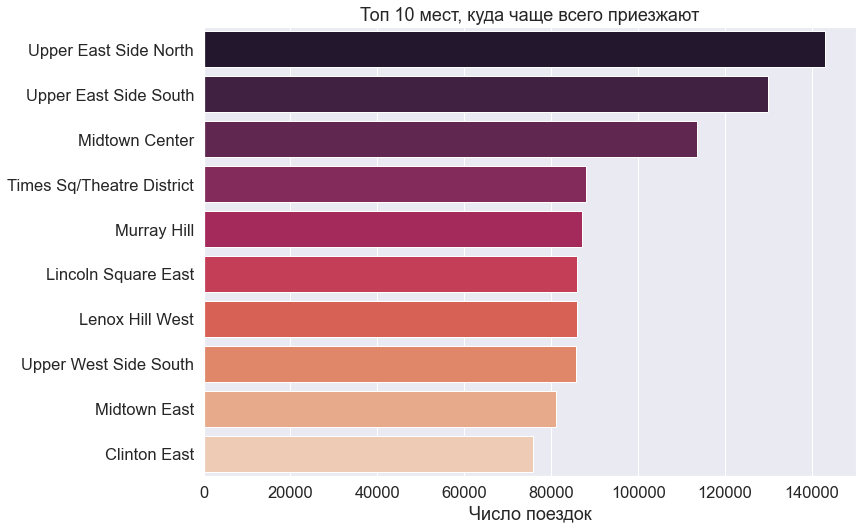

In [32]:
fig = sns.barplot(data=places_to, x='count', y='to', palette='rocket')
plt.xlabel("Число поездок")
plt.ylabel("")
plt.title("Топ 10 мест, куда чаще всего приезжают") 
plt.show(fig)

Выгрузим итоговые данные в формате csv для дальнейшего построения дашборда.

In [29]:
df.to_csv('data_res.csv')